In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import os,json
import warnings

warnings.filterwarnings("ignore")

file_1 = "Data/superhero_info - superhero_info.csv"
file_2 = "Data/superhero_powers - superhero_powers.csv"

hero_df = pd.read_csv(file_1)
powers_df = pd.read_csv(file_2)

## Data Cleaning - Hero 

In [2]:
hero_df.head()

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}"
2,Abin Sur|DC Comics,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}"
3,Abomination|Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
4,Absorbing Man|Marvel Comics,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}"


In [3]:
hero_df.isna().sum()

Hero|Publisher    0
Gender            0
Race              0
Alignment         0
Hair color        0
Eye color         0
Skin color        0
Measurements      0
dtype: int64

In [4]:
hero_df.duplicated().sum()

0

In [5]:
hero_df["Hero|Publisher"].value_counts()

Spider-Man|Marvel Comics       3
Black Canary|DC Comics         2
Nova|Marvel Comics             2
Toxin|Marvel Comics            2
Batman|DC Comics               2
                              ..
Fabian Cortez|Marvel Comics    1
Exodus|Marvel Comics           1
Evilhawk|Marvel Comics         1
Evil Deadpool|Marvel Comics    1
Zoom|DC Comics                 1
Name: Hero|Publisher, Length: 457, dtype: int64

In [6]:
hero_df["Gender"].value_counts()

Male       321
Female     134
Unknown      8
Name: Gender, dtype: int64

In [7]:
hero_df["Race"].value_counts()

Human                156
Unknown              145
Mutant                51
Human / Radiation     11
Android                7
Symbiote               7
Alien                  6
Demon                  6
Cyborg                 6
Kryptonian             5
Atlantean              5
Asgardian              5
Inhuman                4
New God                3
Human-Kree             2
Eternal                2
Demi-God               2
Saiyan                 2
Amazon                 2
Human / Altered        2
Metahuman              2
God / Eternal          2
Human-Vulcan           1
Martian                1
Zombie                 1
Korugaran              1
Talokite               1
Clone                  1
Human-Spartoi          1
Animal                 1
Yautja                 1
Human / Cosmic         1
Tamaranean             1
Mutant / Clone         1
Luphomoid              1
Frost Giant            1
Strontian              1
Czarnian               1
Bolovaxian             1
Human-Vuldarian        1


In [8]:
hero_df["Alignment"].value_counts()

good       311
bad        132
neutral     17
Unknown      3
Name: Alignment, dtype: int64

In [9]:
hero_df["Hair color"].value_counts()

Black               127
Blond                74
Brown                69
No Hair              52
Red                  41
White                22
Unknown              18
Auburn               13
Green                 6
Strawberry Blond      5
Purple                4
Brown / White         4
Grey                  4
black                 3
blond                 3
Silver                3
Blue                  2
Orange                2
Pink                  1
Gold                  1
Red / White           1
Indigo                1
Red / Orange          1
Red / Grey            1
Brownn                1
Yellow                1
Orange / White        1
Magenta               1
Black / Blue          1
Name: Hair color, dtype: int64

In [10]:
hero_df["Hair color"].replace({"blond" : "Blond", "black" : "Black", "Brownn" : "Brown"}, inplace = True)
hero_df["Hair color"].value_counts()

Black               130
Blond                77
Brown                70
No Hair              52
Red                  41
White                22
Unknown              18
Auburn               13
Green                 6
Strawberry Blond      5
Purple                4
Brown / White         4
Grey                  4
Silver                3
Blue                  2
Orange                2
Pink                  1
Gold                  1
Red / White           1
Indigo                1
Red / Orange          1
Red / Grey            1
Yellow                1
Orange / White        1
Magenta               1
Black / Blue          1
Name: Hair color, dtype: int64

In [11]:
hero_df["Eye color"].value_counts()

blue                       182
brown                      102
green                       61
red                         38
Unknown                     17
yellow                      13
black                       12
white                       10
grey                         5
hazel                        5
gold                         3
purple                       3
yellow (without irises)      2
amber                        2
violet                       2
white / red                  1
indigo                       1
silver                       1
green / blue                 1
blue / white                 1
yellow / blue                1
Name: Eye color, dtype: int64

In [12]:
hero_df["Skin color"].value_counts()

Unknown       409
green          15
blue            7
red             7
white           5
grey            4
silver          4
purple          3
gold            2
pink            2
yellow          2
black           1
blue-white      1
orange          1
Name: Skin color, dtype: int64

In [13]:
hero_df["Measurements"].value_counts()

{'Height': '183.0 cm', 'Weight': '90.0 kg'}     6
{'Height': '183.0 cm', 'Weight': '86.0 kg'}     6
{'Height': '178.0 cm', 'Weight': '79.0 kg'}     6
{'Height': '188.0 cm', 'Weight': '95.0 kg'}     6
{'Height': '180.0 cm', 'Weight': '81.0 kg'}     6
                                               ..
{'Height': '701.0 cm', 'Weight': '4.0 kg'}      1
{'Height': '185.0 cm', 'Weight': '89.0 kg'}     1
{'Height': '259.0 cm', 'Weight': '158.0 kg'}    1
{'Height': '191.0 cm', 'Weight': '65.0 kg'}     1
{'Height': '66.0 cm', 'Weight': '17.0 kg'}      1
Name: Measurements, Length: 287, dtype: int64

In [14]:
hero_df["Measurements"] = hero_df["Measurements"].str.replace(' ', '')

In [15]:
hero_df.head()

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height':'203.0cm','Weight':'441.0kg'}"
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height':'191.0cm','Weight':'65.0kg'}"
2,Abin Sur|DC Comics,Male,Ungaran,good,No Hair,blue,red,"{'Height':'185.0cm','Weight':'90.0kg'}"
3,Abomination|Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height':'203.0cm','Weight':'441.0kg'}"
4,Absorbing Man|Marvel Comics,Male,Human,bad,No Hair,blue,Unknown,"{'Height':'193.0cm','Weight':'122.0kg'}"


In [16]:
hero_df[["Hero", "Publisher"]] = hero_df["Hero|Publisher"].str.split("|", expand = True)

In [17]:
hero_df.head()

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height':'203.0cm','Weight':'441.0kg'}",A-Bomb,Marvel Comics
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height':'191.0cm','Weight':'65.0kg'}",Abe Sapien,Dark Horse Comics
2,Abin Sur|DC Comics,Male,Ungaran,good,No Hair,blue,red,"{'Height':'185.0cm','Weight':'90.0kg'}",Abin Sur,DC Comics
3,Abomination|Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height':'203.0cm','Weight':'441.0kg'}",Abomination,Marvel Comics
4,Absorbing Man|Marvel Comics,Male,Human,bad,No Hair,blue,Unknown,"{'Height':'193.0cm','Weight':'122.0kg'}",Absorbing Man,Marvel Comics


In [18]:
hero_df = hero_df.drop(columns = ["Hero|Publisher"])

In [19]:
hero_df.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height':'203.0cm','Weight':'441.0kg'}",A-Bomb,Marvel Comics
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height':'191.0cm','Weight':'65.0kg'}",Abe Sapien,Dark Horse Comics
2,Male,Ungaran,good,No Hair,blue,red,"{'Height':'185.0cm','Weight':'90.0kg'}",Abin Sur,DC Comics
3,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height':'203.0cm','Weight':'441.0kg'}",Abomination,Marvel Comics
4,Male,Human,bad,No Hair,blue,Unknown,"{'Height':'193.0cm','Weight':'122.0kg'}",Absorbing Man,Marvel Comics


In [20]:
hero_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Gender        463 non-null    object
 1   Race          463 non-null    object
 2   Alignment     463 non-null    object
 3   Hair color    463 non-null    object
 4   Eye color     463 non-null    object
 5   Skin color    463 non-null    object
 6   Measurements  463 non-null    object
 7   Hero          463 non-null    object
 8   Publisher     463 non-null    object
dtypes: object(9)
memory usage: 32.7+ KB


In [21]:
hero_df[["Height in cm", "Weight in kg"]] = hero_df["Measurements"].str.split(",", expand = True)
hero_df.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher,Height in cm,Weight in kg
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height':'203.0cm','Weight':'441.0kg'}",A-Bomb,Marvel Comics,{'Height':'203.0cm','Weight':'441.0kg'}
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height':'191.0cm','Weight':'65.0kg'}",Abe Sapien,Dark Horse Comics,{'Height':'191.0cm','Weight':'65.0kg'}
2,Male,Ungaran,good,No Hair,blue,red,"{'Height':'185.0cm','Weight':'90.0kg'}",Abin Sur,DC Comics,{'Height':'185.0cm','Weight':'90.0kg'}
3,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height':'203.0cm','Weight':'441.0kg'}",Abomination,Marvel Comics,{'Height':'203.0cm','Weight':'441.0kg'}
4,Male,Human,bad,No Hair,blue,Unknown,"{'Height':'193.0cm','Weight':'122.0kg'}",Absorbing Man,Marvel Comics,{'Height':'193.0cm','Weight':'122.0kg'}


In [22]:
hero_df = hero_df.drop(columns = ["Measurements"])
hero_df.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height in cm,Weight in kg
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,{'Height':'203.0cm','Weight':'441.0kg'}
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,{'Height':'191.0cm','Weight':'65.0kg'}
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,{'Height':'185.0cm','Weight':'90.0kg'}
3,Male,Human / Radiation,bad,No Hair,green,Unknown,Abomination,Marvel Comics,{'Height':'203.0cm','Weight':'441.0kg'}
4,Male,Human,bad,No Hair,blue,Unknown,Absorbing Man,Marvel Comics,{'Height':'193.0cm','Weight':'122.0kg'}


In [23]:
to_replace = ["{", "}", ":", "'", "Height", "cm"]
for char in to_replace:
    hero_df["Height in cm"] = hero_df["Height in cm"].str.replace(char,'', regex = False)
  
hero_df["Height in cm"].head()

0    203.0
1    191.0
2    185.0
3    203.0
4    193.0
Name: Height in cm, dtype: object

In [24]:
to_replace = ["{", "}", ":", "'", "Weight", "kg"]
for char in to_replace:
    hero_df["Weight in kg"] = hero_df["Weight in kg"].str.replace(char,'', regex = False)
  
hero_df["Weight in kg"].head()

0    441.0
1     65.0
2     90.0
3    441.0
4    122.0
Name: Weight in kg, dtype: object

In [25]:
hero_df["Height in cm"] = hero_df["Height in cm"].astype(float)
hero_df["Weight in kg"] = hero_df["Weight in kg"].astype(float)
hero_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Gender        463 non-null    object 
 1   Race          463 non-null    object 
 2   Alignment     463 non-null    object 
 3   Hair color    463 non-null    object 
 4   Eye color     463 non-null    object 
 5   Skin color    463 non-null    object 
 6   Hero          463 non-null    object 
 7   Publisher     463 non-null    object 
 8   Height in cm  463 non-null    float64
 9   Weight in kg  463 non-null    float64
dtypes: float64(2), object(8)
memory usage: 36.3+ KB


In [26]:
hero_df.head(10)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height in cm,Weight in kg
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0,441.0
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0,65.0
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,185.0,90.0
3,Male,Human / Radiation,bad,No Hair,green,Unknown,Abomination,Marvel Comics,203.0,441.0
4,Male,Human,bad,No Hair,blue,Unknown,Absorbing Man,Marvel Comics,193.0,122.0
5,Male,Human,good,Blond,blue,Unknown,Adam Strange,DC Comics,185.0,88.0
6,Male,Human,good,Brown,brown,Unknown,Agent Bob,Marvel Comics,178.0,81.0
7,Male,Unknown,good,Unknown,Unknown,Unknown,Agent Zero,Marvel Comics,191.0,104.0
8,Male,Unknown,bad,White,blue,Unknown,Air-Walker,Marvel Comics,188.0,108.0
9,Male,Cyborg,bad,Black,brown,Unknown,Ajax,Marvel Comics,193.0,90.0


## Data Cleaning - Powers

In [27]:
powers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hero_names  667 non-null    object
 1   Powers      667 non-null    object
dtypes: object(2)
memory usage: 10.5+ KB


In [28]:
powers_df.head()

,hero_names,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du..."
3,Abin Sur,Lantern Power Ring
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt..."


In [29]:
powers_df.isna().sum()

hero_names    0
Powers        0
dtype: int64

In [30]:
powers_df.duplicated().sum()

0

In [31]:
powers_df["Powers"] = powers_df["Powers"].str.split(",")
powers_df.head()

,hero_names,Powers
0,3-D Man,"[Agility, Super Strength, Stamina, Super Speed]"
1,A-Bomb,"[Accelerated Healing, Durability, Longevity, S..."
2,Abe Sapien,"[Agility, Accelerated Healing, Cold Resistance..."
3,Abin Sur,[Lantern Power Ring]
4,Abomination,"[Accelerated Healing, Intelligence, Super Stre..."


In [32]:
powers = powers_df.loc[1, "Powers"]
powers

['Accelerated Healing',
 'Durability',
 'Longevity',
 'Super Strength',
 'Stamina',
 'Camouflage',
 'Self-Sustenance']

In [33]:
exploded = powers_df.explode("Powers")
exploded[["hero_names", "Powers"]].head()

,hero_names,Powers
0,3-D Man,Agility
0,3-D Man,Super Strength
0,3-D Man,Stamina
0,3-D Man,Super Speed
1,A-Bomb,Accelerated Healing


In [34]:
cols_to_make = exploded["Powers"].dropna().unique()
cols_to_make

array(['Agility', 'Super Strength', 'Stamina', 'Super Speed',
       'Accelerated Healing', 'Durability', 'Longevity', 'Camouflage',
       'Self-Sustenance', 'Cold Resistance', 'Underwater breathing',
       'Marksmanship', 'Weapons Master', 'Intelligence', 'Telepathy',
       'Immortality', 'Reflexes', 'Enhanced Sight', 'Sub-Mariner',
       'Lantern Power Ring', 'Invulnerability', 'Animation',
       'Super Breath', 'Dimensional Awareness', 'Flight', 'Size Changing',
       'Teleportation', 'Magic', 'Dimensional Travel',
       'Molecular Manipulation', 'Energy Manipulation', 'Power Cosmic',
       'Energy Absorption', 'Elemental Transmogrification',
       'Fire Resistance', 'Natural Armor', 'Heat Resistance',
       'Matter Absorption', 'Regeneration', 'Stealth', 'Power Suit',
       'Energy Blasts', 'Energy Beams', 'Heat Generation', 'Danger Sense',
       'Phasing', 'Force Fields', 'Hypnokinesis', 'Invisibility',
       'Enhanced Senses', 'Jump', 'Shapeshifting', 'Elasticity',
 

In [35]:
powers_df["Powers"] = powers_df["Powers"].astype(str)

In [36]:
for col in cols_to_make:
    powers_df[col] = powers_df["Powers"].str.contains(col)
powers_df.head(100)

,hero_names,Powers,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,Camouflage,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,"['Agility', 'Super Strength', 'Stamina', 'Supe...",True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,"['Accelerated Healing', 'Durability', 'Longevi...",False,True,True,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,"['Agility', 'Accelerated Healing', 'Cold Resis...",True,True,True,False,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,['Lantern Power Ring'],False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,"['Accelerated Healing', 'Intelligence', 'Super...",False,True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Black Panther,"['Agility', 'Stealth', 'Marksmanship', 'Weapon...",True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
96,Black Vulcan,"['Flight', 'Super Speed', 'Electrokinesis', 'T...",False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
97,Black Widow,"['Agility', 'Stealth', 'Marksmanship', 'Weapon...",True,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
98,Blackout,"['Agility', 'Accelerated Healing', 'Durability...",True,True,True,True,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False


In [37]:
powers_df = powers_df.drop(columns = ["Powers"])

In [38]:
powers_df.head()

,hero_names,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,Camouflage,Self-Sustenance,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,True,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,True,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,True,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [39]:
hero_df.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height in cm,Weight in kg
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0,441.0
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0,65.0
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,185.0,90.0
3,Male,Human / Radiation,bad,No Hair,green,Unknown,Abomination,Marvel Comics,203.0,441.0
4,Male,Human,bad,No Hair,blue,Unknown,Absorbing Man,Marvel Comics,193.0,122.0


In [40]:
final_df = pd.merge(hero_df, powers_df, left_on = "Hero", right_on = "hero_names")

final_df.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height in cm,Weight in kg,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0,65.0,...,False,False,False,False,False,False,False,False,False,False
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,185.0,90.0,...,False,False,False,False,False,False,False,False,False,False
3,Male,Human / Radiation,bad,No Hair,green,Unknown,Abomination,Marvel Comics,203.0,441.0,...,False,False,False,False,False,False,False,False,False,False
4,Male,Human,bad,No Hair,blue,Unknown,Absorbing Man,Marvel Comics,193.0,122.0,...,False,False,False,False,False,False,False,False,False,False


## EDA

### Compare the average weight of super powers who have Super Speed to those who do not.

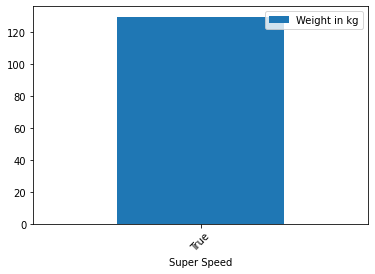

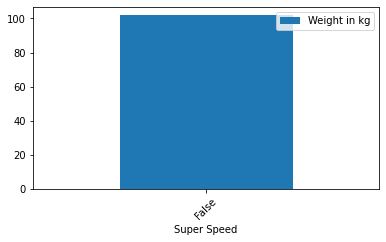

In [41]:
speed_filter = final_df["Super Speed"] == True
speed_df = final_df.loc[speed_filter, :]
fast_weight = speed_df.groupby("Super Speed", as_index = False)["Weight in kg"].mean()

slow = final_df.loc[~speed_filter]
slow_weight = slow.groupby("Super Speed", as_index = False)["Weight in kg"].mean()

fast_weight.plot(kind = "bar", x = "Super Speed", y = "Weight in kg")
plt.xticks(rotation = 45)
slow_weight.plot(kind = "bar", x = "Super Speed", y = "Weight in kg")
plt.xticks(rotation = 45)
plt.tight_layout(3);

### What is the average height of heroes for each publisher?

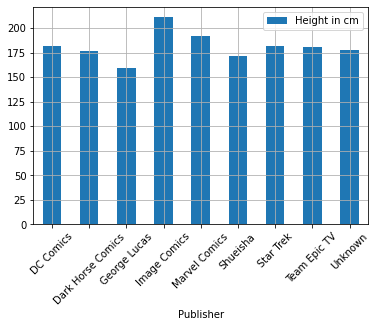

In [54]:
pub_height = final_df.groupby("Publisher", as_index = False)["Height in cm"].mean()
pub_height.plot(kind = "bar", x = "Publisher", y = "Height in cm")
plt.xticks(rotation = 45)
plt.grid(True);